In [4]:
import pandas as pd
df = pd.read_pickle('data/intersection_of_visits.pkl')

Divide visits into two categories, one category with sendBeacon calls and one category without sendBeacon calls.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

df_categories = df.copy()
def test(row):
    if row['apis'] == {'callStats': {}, 'savedCalls': []} or row['apis'] == None:
        return 'contains no sendBeacon call'
    else:
        return 'contains sendBeacon call'

df_categories['sendBeacon_category'] = df_categories.apply(lambda row: test(row), axis=1)

display(df_categories)

,initialUrl,finalUrl,cmps,requests,cookies,apis,targets,autoconsent_action,sendBeacon_category
0,http://tradplusad.com/,https://www.tradplusad.com/,cmps failed,"[{'url': 'http://tradplusad.com/', 'method': '...","[{'name': 'invite_query', 'domain': '.tradplus...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://tradplusad.co...",optIn,contains no sendBeacon call
1,http://alexa.com/,https://alexa.com/,no cmps found,"[{'url': 'http://alexa.com/', 'method': 'GET',...",[],"{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://alexa.com/'}]",optIn,contains no sendBeacon call
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,succeeded,"[{'url': 'http://bstatic.com/', 'method': 'GET...","[{'name': 'X-AB', 'domain': 'sc-static.net', '...",{'callStats': {'https://cf.bstatic.com/static/...,"[{'type': 'page', 'url': 'http://bstatic.com/'...",optIn,contains sendBeacon call
3,http://aniwatch.to/,https://aniwatch.to/,no cmps found,"[{'url': 'http://aniwatch.to/', 'method': 'GET...","[{'name': '_ga', 'domain': '.aniwatch.to', 'pa...",{'callStats': {'https://www.googletagmanager.c...,"[{'type': 'page', 'url': 'http://aniwatch.to/'...",optIn,contains sendBeacon call
4,http://poste.it/,http://poste.it/,succeeded,"[{'url': 'http://poste.it/', 'method': 'GET', ...","[{'name': 'demdex', 'domain': '.demdex.net', '...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://poste.it/'}]",optIn,contains no sendBeacon call
...,...,...,...,...,...,...,...,...,...
9614,http://westlaw.com/,https://signon.thomsonreuters.com/?productid=C...,no cmps found,"[{'url': 'http://westlaw.com/', 'method': 'GET...","[{'name': 'BIGipServerprod_apache_b', 'domain'...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://westlaw.com/'}]",optOut,contains no sendBeacon call
9615,http://qortex.ai/,https://www.qortex.ai/,no cmps found,"[{'url': 'http://qortex.ai/', 'method': 'GET',...","[{'name': '__cf_bm', 'domain': '.vimeo.com', '...",{'callStats': {'https://www.googletagmanager.c...,"[{'type': 'page', 'url': 'http://qortex.ai/'}]",optOut,contains sendBeacon call
9616,http://sothebys.com/,https://www.sothebys.com/en/,no cmps found,"[{'url': 'http://sothebys.com/', 'method': 'GE...","[{'name': 'test_cookie', 'domain': '.doublecli...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://sothebys.com/'}]",optOut,contains no sendBeacon call
9617,http://mozilla.org/,https://www.mozilla.org/,no cmps found,"[{'url': 'http://mozilla.org/', 'method': 'GET...","[{'name': '_ga', 'domain': '.mozilla.org', 'pa...",{'callStats': {'https://www.googletagmanager.c...,"[{'type': 'page', 'url': 'http://mozilla.org/'}]",optOut,contains sendBeacon call


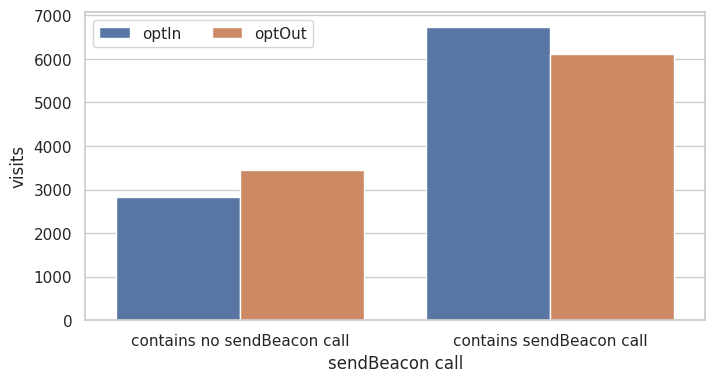

autoconsent_action  sendBeacon_category        
optIn               contains sendBeacon call       6734
                    contains no sendBeacon call    2829
optOut              contains sendBeacon call       6120
                    contains no sendBeacon call    3443
Name: count, dtype: int64

In [6]:
f, ax = plt.subplots(figsize=(8,4))
sns.countplot(x="sendBeacon_category", hue="autoconsent_action", data=df_categories)
ax.set(ylabel="visits", xlabel="sendBeacon call")
ax.legend(ncol=2, loc="upper left", frameon=True)
plt.show()

display(df_categories.groupby('autoconsent_action').sendBeacon_category.value_counts())

Show number of visits having a sendBeacon call only for optIn/optOut.

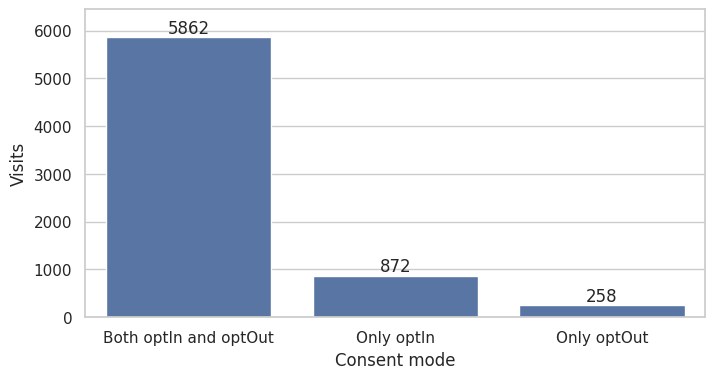

In [7]:
import numpy as np

df_optIn = df_categories[
            (df_categories['autoconsent_action'] == 'optIn') &
            (df_categories['sendBeacon_category'] == 'contains sendBeacon call')
            ]
df_optOut = df_categories[
            (df_categories['autoconsent_action'] == 'optOut') &
            (df_categories['sendBeacon_category'] == 'contains sendBeacon call')
            ]

intersect = np.intersect1d(df_optIn['initialUrl'], df_optOut['initialUrl'])

f, ax = plt.subplots(figsize=(8,4))

visits_clear_graph = {
    "Both optIn and optOut": len(intersect),
    "Only optIn": len(df_optIn)-len(intersect),
    "Only optOut": len(df_optOut)-len(intersect),
}
sns.barplot(data=visits_clear_graph)
ax.set_xlabel('Consent mode')
ax.set_ylabel("Visits")
ax.bar_label(ax.containers[0])
ax.set_ymargin(0.1)

plt.show()

Show the total number of sendBeacon calls made by unfolding all sendBeacon calls.

In [8]:
from python.unfold_sendBeacon_calls import unfold_sendBeacon_calls

df_unfolded = unfold_sendBeacon_calls(df_categories)
df_unfolded = df_unfolded.drop('sendBeacon_category', axis=1)

display(df_unfolded)

,initialUrl,finalUrl,autoconsent_action,source,target,argument
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://cf.bstatic.com/static/js/main_cloudfro...,https://www.booking.com/js_tracking?lang=en-gb...,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://www.googletagmanager.com/gtm.js?id=GTM...,https://www.google.com/pagead/landing?gcs=G11-...,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.analytics.google.com/g/collect...,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://www.googletagmanager.com/gtag/js?id=G-...,https://stats.g.doubleclick.net/g/collect?v=2&...,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://sc-static.net/scevent.min.js,https://tr.snapchat.com/p,"{""ctx"":{""bt"":""1d53c387"",""c1"":""fd2b9937-426b-40..."
...,...,...,...,...,...,...
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,https://f.vimeocdn.com/js_opt/modules/utils/vu...,https://vimeo.com/ablincoln/vuid?pid=cae73d017...,[]
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.analytics.google.com/g/collect...,[]
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.analytics.google.com/g/collect...,[]
9617,http://mozilla.org/,https://www.mozilla.org/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.google-analytics.com/g/collect...,[]


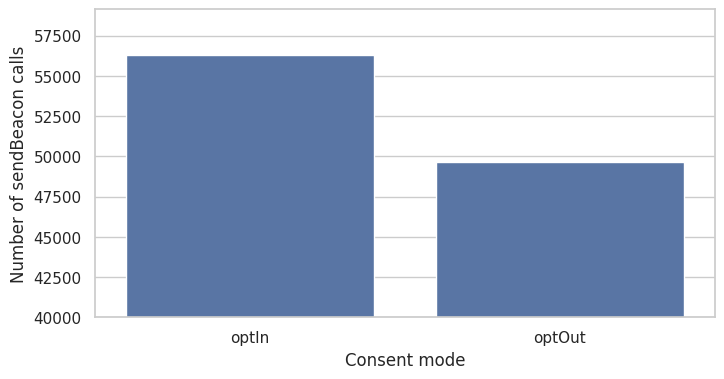

autoconsent_action
optIn     56326
optOut    49678
Name: count, dtype: int64

In [9]:
f, ax = plt.subplots(figsize=(8,4))

sns.countplot(x='autoconsent_action', data=df_unfolded)
ax.set(ylabel="Number of sendBeacon calls", xlabel="Consent mode")
ax.set(ylim=(40000, None))
plt.show()

display(df_unfolded.autoconsent_action.value_counts())

The above information can be used to calculate the average number of sendBeacon calls made for both consent modes. The following code shows the median number of sendBeacon calls made.

In [14]:
import tldextract

def get_rank_counts(consent_mode, chunk_size):
    # Copy the DataFrame and extract registered domain names
    df_sb_counts = df_unfolded.copy()
    df_sb_counts['initialUrl'] = df_sb_counts['initialUrl'].map(lambda url: tldextract.extract(url).registered_domain)

    # Filter and count occurrences, drop unnecessary columns, and rename columns
    df_sb_counts = df_sb_counts[df_sb_counts['autoconsent_action'] == consent_mode].groupby('initialUrl').count()
    df_sb_counts = df_sb_counts.drop(['autoconsent_action', 'source', 'target', 'argument'], axis=1)
    df_sb_counts = df_sb_counts.rename(columns={'finalUrl': 'Count'})

    # Read URL rankings from CSV file
    url_ranking = pd.read_csv('../tranco_list_crawled_rankings.csv')

    # Initialize an empty list to store rank, URL, and sendBeacon_calls information
    rank_counts = []

    # Iterate over each row in URL rankings
    for rank, url in url_ranking.values:
        # Initialize 'sendBeacon_calls' to 0 and update it if URL is found in 'df_optIn_counts'
        sendBeacon_calls = 0
        if url in df_sb_counts['Count']:
            sendBeacon_calls = df_sb_counts['Count'][url]
        rank_counts.append({'rank': rank, 'url': url, 'sendBeacon_calls': sendBeacon_calls})

    # Create DataFrame and display it
    df_sb_rank_counts = pd.DataFrame(rank_counts)
    display(df_sb_rank_counts[:15])

    # Group data by every CHUNK_SIZE ranks and calculate median sendBeacon_calls for each group
    df_grouped = df_sb_rank_counts.groupby(df_sb_rank_counts['rank'] // chunk_size * chunk_size)['sendBeacon_calls'].median().reset_index()

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_grouped, x='rank', y='sendBeacon_calls')
    plt.xlabel('Rank Group ({} ranks each)'.format(chunk_size))
    plt.ylabel('Median Number of sendBeacon calls')
    plt.xticks(rotation=90)
    plt.tight_layout()

    # Adjust bar width to make bars touch each other
    for patch in plt.gca().patches:
        patch.set_width(1)

    plt.show()

optIn


,rank,url,sendBeacon_calls
0,0,google.com,4
1,1,facebook.com,1
2,2,googleapis.com,0
3,3,youtube.com,0
4,4,apple.com,0
5,5,microsoft.com,0
6,6,twitter.com,0
7,7,instagram.com,0
8,8,gstatic.com,0
9,9,linkedin.com,2


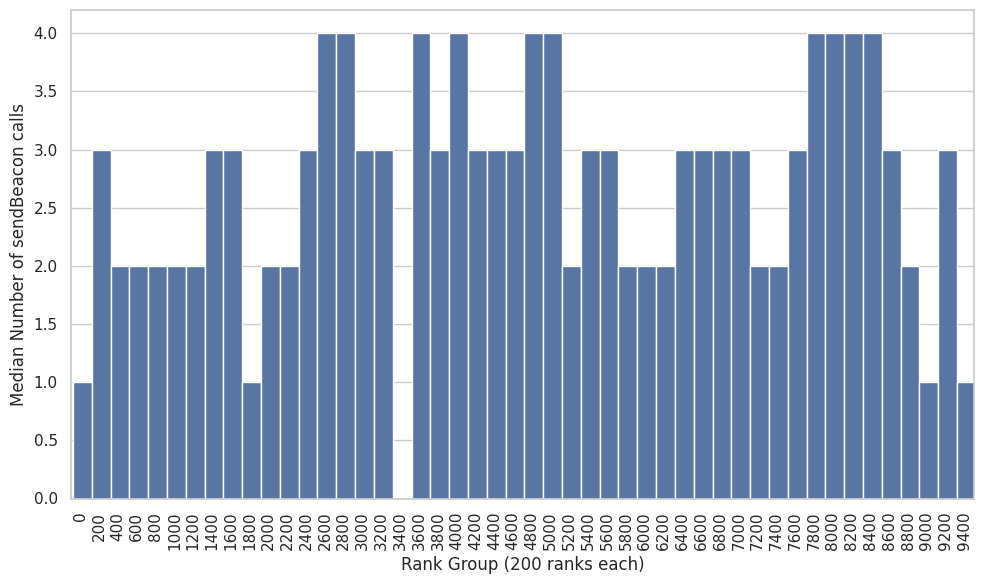

optOut


,rank,url,sendBeacon_calls
0,0,google.com,4
1,1,facebook.com,1
2,2,googleapis.com,0
3,3,youtube.com,0
4,4,apple.com,0
5,5,microsoft.com,0
6,6,twitter.com,0
7,7,instagram.com,1
8,8,gstatic.com,0
9,9,linkedin.com,3


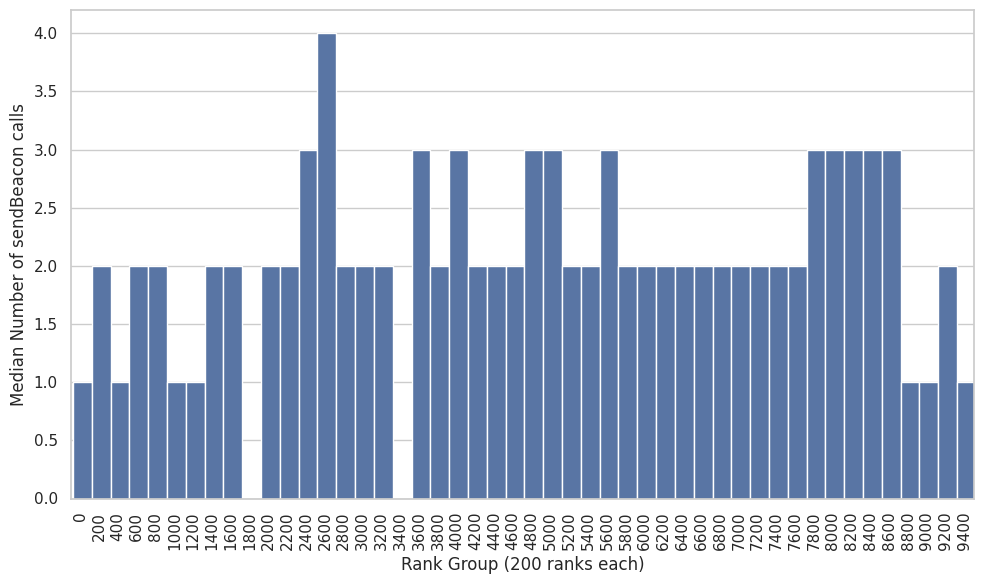

In [15]:
print("optIn")
get_rank_counts('optIn', 200)
print("optOut")
get_rank_counts('optOut', 200)